# Exploring Dandiset 001433: Breathing Rhythm and Place Dataset

**Notebook generated with AI assistance.**  
Please use caution and independently verify results or code—careful review is always recommended when analyzing scientific datasets!

---

This notebook provides a guided introduction to **Dandiset 001433: Breathing rhythm and place dataset**, available at:  
[https://dandiarchive.org/dandiset/001433/0.250507.2356](https://dandiarchive.org/dandiset/001433/0.250507.2356)

## Overview

This Dandiset includes behavioral and electrophysiological data from freely-behaving mice, focusing on recordings of sniffing (via thermistor) and local field potentials (LFP) from the olfactory bulb. The data are collected without any external stimulus, reward, or task.

The notebook will:
- Introduce the dataset structure and content
- Demonstrate how to load assets with the `dandi` API and stream NWB files remotely
- Show how to inspect LFP and sniffing data, including plotting examples for exploratory analysis
- Guide users in exploring electrode metadata and behavioral event timing

**Required packages:**  
- `dandi`  
- `pynwb`  
- `remfile`  
- `h5py`  
- `matplotlib`  
- `pandas`  
- `numpy`

---

Let's get started!

# 1. Set up: Import packages

In [1]:
# Import necessary libraries for DANDI API access, NWB I/O, and data inspection
from dandi.dandiapi import DandiAPIClient
import remfile
import h5py
import pynwb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 2. Connect to DANDI and List Available Assets

Let's connect to the DANDI API, open Dandiset 001433 (version 0.250507.2356), and list the available electrophysiology session files for `sub-4122` (one of the recorded mice).

In [2]:
# Connect to the DANDI archive and retrieve assets
dandiset_id = "001433"
dandiset_version = "0.250507.2356"
subject_id = "sub-4122"

# Open the dandiset
client = DandiAPIClient()
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# List available NWB files for the subject
assets = list(dandiset.get_assets_by_glob(f"{subject_id}/{subject_id}_ses-*_ecephys.nwb"))
print(f"Found {len(assets)} NWB files for {subject_id}:")
for asset in assets:
    print("-", asset.path)

Found 3 NWB files for sub-4122:
- sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb
- sub-4122/sub-4122_ses-20250507T152930_ecephys.nwb
- sub-4122/sub-4122_ses-20250507T152933_ecephys.nwb


# 3. Load an NWB File (Streaming from Remote)

We'll work with the first session file (`sub-4122_ses-20250507T152927_ecephys.nwb`).  
The data is streamed remotely—no download needed!

In [3]:
# Select the first NWB file for the subject and get its download URL
nwb_asset = assets[0]
url = nwb_asset.download_url

# Open the remote NWB file for h5py and pynwb streaming
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


# 4. Inspect Session Metadata

Let's see the key details recorded in this session.

In [4]:
# Display basic session metadata
print("Session description:", nwb.session_description)
print("Session start time:", nwb.session_start_time)
print("Subject ID:", nwb.subject.subject_id)
print("Subject age:", nwb.subject.age)
print("Subject sex:", nwb.subject.sex)
print("Subject species:", nwb.subject.species)
print("Experimenter:", nwb.experimenter)
print("Lab:", nwb.lab)
print("Institution:", nwb.institution)
print("Keywords:", list(nwb.keywords))
print("Experiment description:", nwb.experiment_description)

Session description: LFP and sniff recording
Session start time: 2025-05-07 15:29:27.359523-07:00
Subject ID: 4122
Subject age: P90D
Subject sex: M
Subject species: Mus musculus
Experimenter: ('Rafilson, Sidney',)
Lab: Smear lab
Institution: University of Oregon
Keywords: ['olfactory bulb', 'LFP', 'sniffing', 'mouse', 'neuroscience']
Experiment description: LFP and sniff behavior recording


# 5. Inspect Electrode Metadata

We'll examine electrode locations and filtering information—useful for interpreting the LFP channels.

In [5]:
# Electrode table as a pandas DataFrame
electrodes_df = nwb.electrodes.to_dataframe()
electrodes_df.head()

,location,group,group_name,filtering
id,,,,
0,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x125...,LFPGroup,none
1,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x125...,LFPGroup,none
2,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x125...,LFPGroup,none
3,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x125...,LFPGroup,none
4,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x125...,LFPGroup,none


# 6. Explore LFP Data from Olfactory Bulb

The LFP data are recorded at 1000 Hz from 16 electrodes.

We'll visualize:
- Raw traces from the first 5 channels, 5 seconds
- A heatmap to show all 16 channels at once

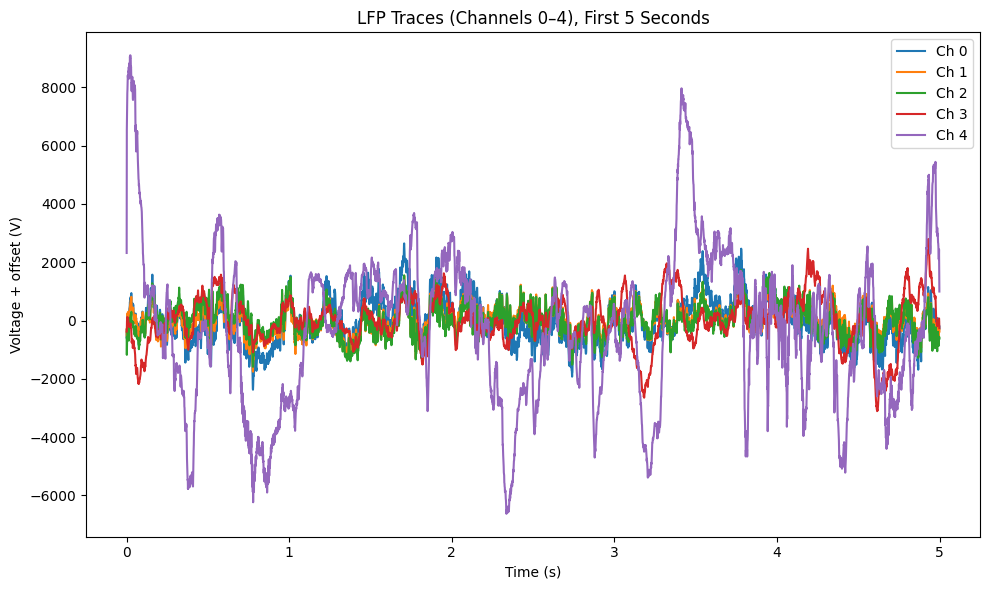

In [6]:
# Access LFP ElectricalSeries
LFP = nwb.acquisition["LFP"]

# Plot the first 5 seconds for the first 5 electrodes (channels)
fs = LFP.rate               # Sampling rate
start = 0                   # Start time in seconds
duration = 5                # Duration to plot (seconds)
n_display_ch = 5

# Calculate index range for plotting
idx_start = int(start * fs)
idx_end = int((start + duration) * fs)

data_to_plot = LFP.data[idx_start:idx_end, :n_display_ch]

plt.figure(figsize=(10, 6))
t = np.arange(idx_end-idx_start) / fs

offset = 0
for i in range(n_display_ch):
    plt.plot(t, data_to_plot[:, i] + offset, label=f'Ch {i}')
    offset += 0.2  # Space between traces

plt.xlabel('Time (s)')
plt.ylabel('Voltage + offset (V)')
plt.title(f'LFP Traces (Channels 0–4), First {duration} Seconds')
plt.legend()
plt.tight_layout()
plt.show()

Let's check the activity of **all 16 channels** in a heatmap for the same 5-second window.

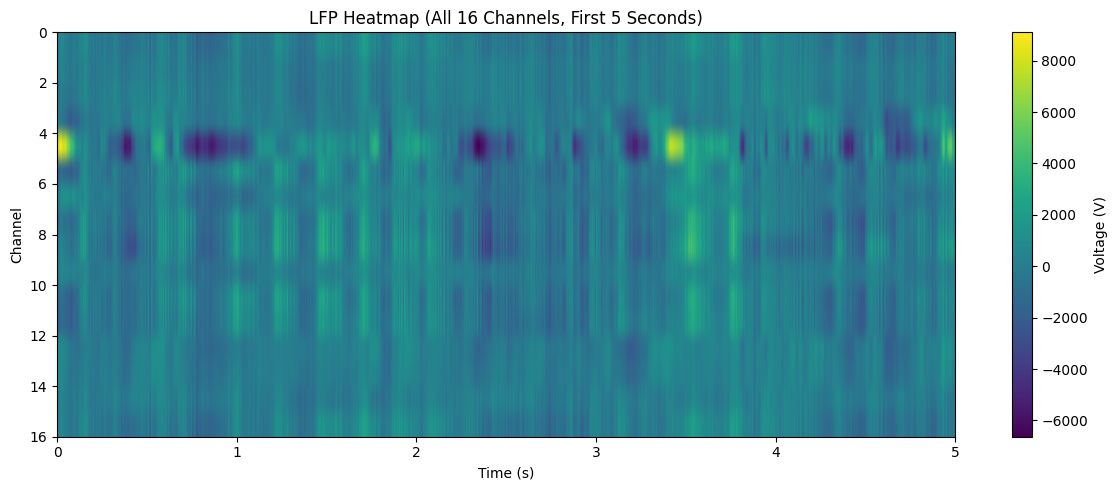

In [7]:
# Plot heatmap of all 16 LFP channels for first 5 seconds
data_full = LFP.data[idx_start:idx_end, :].T  # Shape: (channels, time)

plt.figure(figsize=(12, 5))
plt.imshow(data_full, aspect='auto', extent=[0, duration, 16, 0], cmap='viridis')
plt.colorbar(label="Voltage (V)")
plt.xlabel("Time (s)")
plt.ylabel("Channel")
plt.title("LFP Heatmap (All 16 Channels, First 5 Seconds)")
plt.tight_layout()
plt.show()

# 7. Explore Sniff Signal Data

The sniffing behavior is recorded via a thermistor as a voltage signal.  
Let's plot a segment to visualize the breathing rhythm.

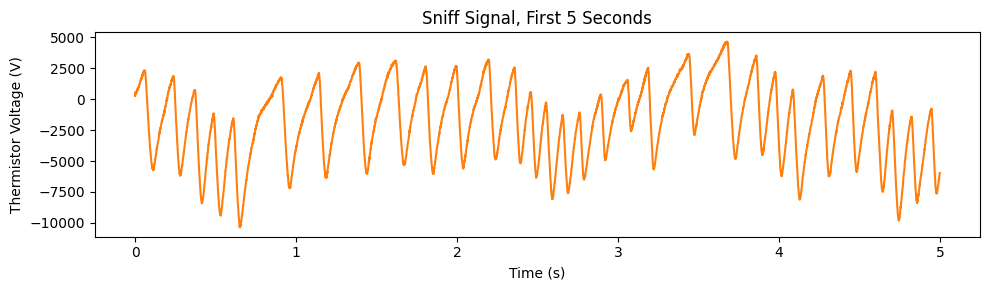

In [8]:
# Access SniffSignal TimeSeries
SniffSignal = nwb.acquisition["SniffSignal"]
sniff = SniffSignal.data[idx_start:idx_end]
t_sniff = np.arange(idx_end-idx_start) / fs

plt.figure(figsize=(10, 3))
plt.plot(t_sniff, sniff, color='tab:orange')
plt.xlabel("Time (s)")
plt.ylabel("Thermistor Voltage (V)")
plt.title(f"Sniff Signal, First {duration} Seconds")
plt.tight_layout()
plt.show()

# 8. Inhalation and Exhalation Event Times

Detailed behavioral event times are provided for each inhalation and exhalation.

Let's plot markers for inhalation and exhalation on top of the sniff signal for the first 5 seconds.

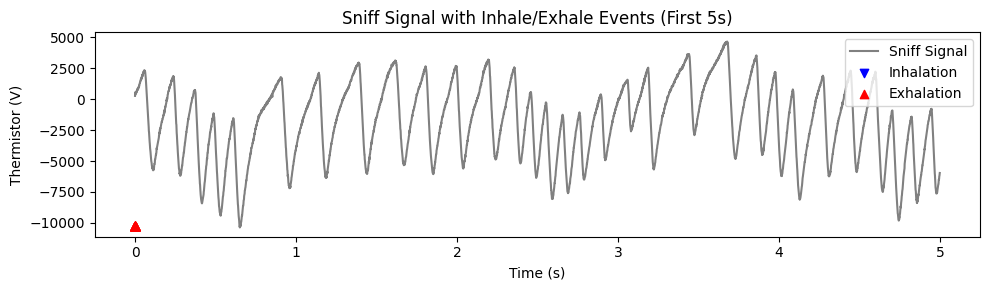

In [9]:
# Access inhalation and exhalation event timestamps (in seconds)
behavior = nwb.processing["behavior"]
inhalation_times = behavior.data_interfaces["inhalation_time"].timestamps[:]
exhalation_times = behavior.data_interfaces["exhalation_time"].timestamps[:]

# Restrict to first 5 seconds
inh_5s = inhalation_times[(inhalation_times >= start) & (inhalation_times < (start + duration))]
exh_5s = exhalation_times[(exhalation_times >= start) & (exhalation_times < (start + duration))]

plt.figure(figsize=(10, 3))
plt.plot(t_sniff, sniff, label="Sniff Signal", color="0.5")
plt.scatter(inh_5s-start, np.ones_like(inh_5s)*np.max(sniff)*1.01, marker="v", color="b", label="Inhalation")
plt.scatter(exh_5s-start, np.ones_like(exh_5s)*np.min(sniff)*0.99, marker="^", color="r", label="Exhalation")
plt.xlabel("Time (s)")
plt.ylabel("Thermistor (V)")
plt.title("Sniff Signal with Inhale/Exhale Events (First 5s)")
plt.legend()
plt.tight_layout()
plt.show()

# 9. Summary and Next Steps

In this notebook, we:
- Connected to DANDI and listed available NWB assets for a subject
- Loaded electrophysiology and sniffing data *directly from the remote archive*
- Explored session and electrode metadata
- Visualized LFP signals, sniffing signal, and behavioral event timings

**You can extend this exploration by:**
- Analyzing spectral content of LFPs
- Comparing sniff rhythms across sessions or animals
- Investigating relationships between LFP and sniffing phase

Consult the dataset's metadata and DANDI landing page for further details and documentation.  
[DANDI:001433/0.250507.2356](https://dandiarchive.org/dandiset/001433/0.250507.2356)

---

*Questions or errors? Please verify steps and consult the dataset authors or DANDI support!*